# System Setup

In [1]:
import numpy as np
import mdtraj as md
import pandas as pd
import nglview as nv
import seaborn as sns
from scipy.spatial.distance import cdist

## Protein Visualization and read Residue ID 

In [2]:
# load data from the pdb file with mdtraj module and save it as pandas df
path2AB = 'hmx.B99990001.pdb'
AB = md.load(path2AB)
table,_ = AB.topology.to_dataframe()

# Get atomnumber residues and atomic coordinates for both proteins
A_num = table.query('chainID == 0').shape[0]
B_num = table.query('chainID == 1').shape[0]
A_resid = table.query('chainID == 0').resSeq.unique()
B_resid = table.query('chainID == 1').resSeq.unique()
A_xyz = AB.xyz[:,:A_num][0]
B_xyz = AB.xyz[:,-B_num:][0]

# Calculating the interface residue
cutoff = 0.5 
# boolean pair matrix specifying contact or not with 1 or 0 at the respective matrix element
bool_iatoms = (cdist(A_xyz,B_xyz) < cutoff).astype(int)
# get the indices of interface atoms with np.where() and only keep the unique ones
A_iatoms, B_iatoms = np.where(bool_iatoms == 1)
A_iatoms = np.unique(A_iatoms)+1
B_iatoms = np.unique(B_iatoms)+A_num

# locate the interface atoms in the data frame and save the unique residues as interface residues
A_ires = table.loc[A_iatoms,:].resSeq.unique()
B_ires = table.loc[B_iatoms,:].resSeq.unique()

<AxesSubplot:>

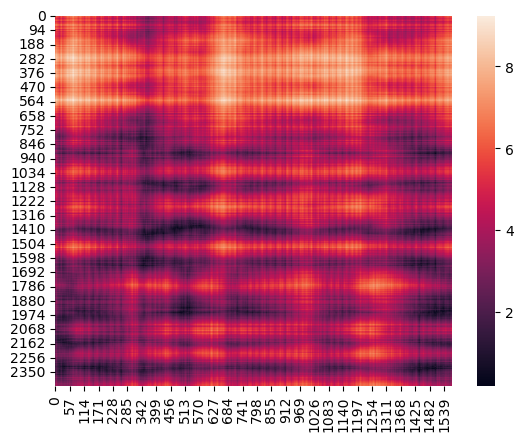

In [3]:
# Visualize the interatomic distance between A and B
sns.heatmap(cdist(A_xyz,B_xyz))

In [6]:
# Visualization of the protein chains (ribbons) and the interface (balls and sticks)
view = nv.show_mdtraj(AB)
view.clear()
view.add_cartoon(selection=":A",opacity=1,color="blue")
view.add_cartoon(selection=":B",opacity=1,color="red")
# Check if the interface residues are at the interface
for res in np.concatenate([A_ires,B_ires]):
    view.add_ball_and_stick(selection=str(res),opacity=1,aspectRatio=1)
view

NGLWidget()